In [52]:
import pandas as pd
import seaborn as sns

In [152]:
f = open("test_out.txt", 'r')
l = f.read()
useful = []
for a in l.split("\n"):
    if "bench" in a or "Benchmarking" in a:
        continue
    r = a.split("/")
    if len(r) < 3:
        continue
    r.extend(r[2].split())
    del r[2]
    useful.append(r)

In [166]:
df = pd.DataFrame(data=useful)
df["method"] = df[1].str.split("_", expand=True)[0]
df["n_pts"] = df[1].str.split("_", expand=True)[1].astype(int)
df["n_poly"] = df[2].astype(int)
df["op"] = df[0]
df["time"] = df[6].astype(float)
df.loc[a[7] == "s", "time"] *= 1000 # adjust for seconds units
dfm1open = df[(df["method"] == "m1") & (df["op"] == "open")].pivot(index="n_pts", columns="n_poly", values="time")
dfm1veri = df[(df["method"] == "m1") & (df["op"] == "verify")].pivot(index="n_pts", columns="n_poly", values="time")

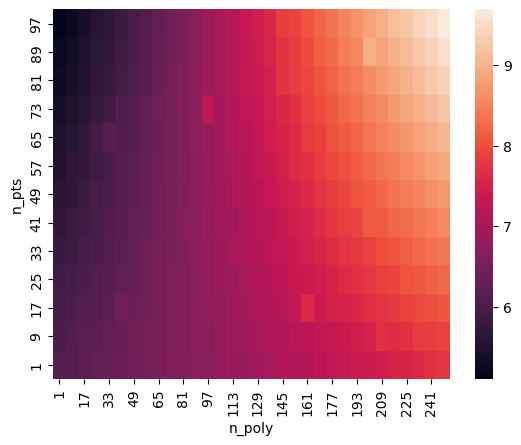

In [172]:
def plot_heatmap(df):
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.reindex(sorted(df.index, reverse=True), axis=0)
    df = df.loc[df.index < 100]
    sns.heatmap(data=df)
plot_heatmap(dfm1open)

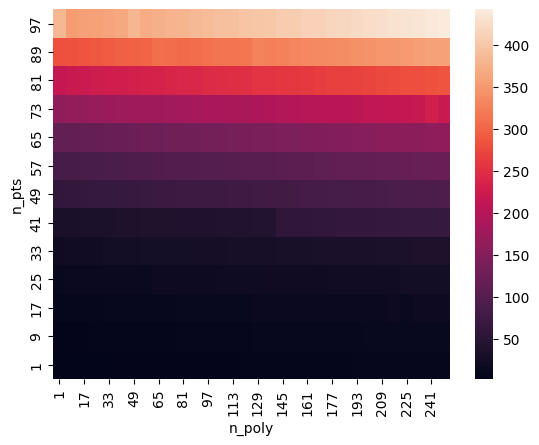

In [173]:
plot_heatmap(dfm1veri)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [118]:
m1open = dfp[(dfp["method"] == "m1") & (dfp["op"] == "open")]
m1open

KeyError: 'method'

In [81]:
sns.heatmap(data=m1open, x="n_pts", y="n_poly")

NameError: name 'm1open' is not defined